In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Métodos de evaluación 

Por ahora hemos visto que:
    
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y prueba para poder evaluar el performance del algoritmo
- Existen diversas **métricas para evaluar rendimiento**, y elegimos la nuestra según las caracteristicas de nuestro problema (Cuantitativa)
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

** Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio, compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state*.

In [3]:
X = pd.read_csv('X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=1)  #random state 1 nos permite hacer una aleatoriedad identica, 0 da aleatoriedades distintas 

In [5]:
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)

In [6]:
pd.DataFrame.equals(X_train,X2_train)     # Se hace la prueba de que hay una aleatoriedad igual con 1 

True

## **Cross Validation**  
Hay una mejor forma de evaluar la performance de nuestro modelo y esto es a traves del metodo cross validation, en lugar de train_test_split.

Esto es porque es un metodo mas robusto con respecto a separar los datos, 
Con train_test_split el score puede variar, lo que necesitamos es una metrica robusta que no tenga depencia a la separación  
El train_test_split se utiliza para prototipear rapidamente, cross validation se tarda mas.
Pero el cross validation se ocupa para hacer el calculo final del performance

<img src="img/crossval.png">

In [7]:
from sklearn.model_selection import cross_val_score     #Nos da los score del test
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv=5,scoring='r2')         #Con 5 o 10 folds se obtiene un score robusto, cv= cuantos pedazos quiero separar mi validación, el scoring r2 viene por defecto, solo lo ponemos para asegurarnos
scores

array([0.58963411, 0.69006588, 0.55223253, 0.18167866, 0.23450509])

In [8]:
scores.mean()

0.44962325317132007

In [9]:
Lasso().fit(X_train,y_train).score(X_test,y_test)     #El resultado puede ser engañoso comparandolo con el cross_val

0.79383965545194

## Selección de modelos

** Overfitting o underfitting?**

Recuerden que para saber si estamos en overfitting o en underfitting necesitamos los scores de entrenamiento y test.

Un sesgo alto está ligado al Underfitting  

Una varianza alta esta ligada al Overfitting.

Un modelo simple tendrá un sesgo alto (underfitting) Errores en Train y Test, un modelo complejo tendrá una varianza alta (overfitting). Pocos erroes en Train y Muchos Errores en Test


In [16]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.5/site-packages


In [10]:
from sklearn.model_selection import cross_validate    #Es una func mas poderosa que el cross_val_score, porque nos da tiempos de prediccion y scores de train y test
results = cross_validate(Lasso(),X,y,return_train_score=True,cv=5) #Cross_validation, nos da 5 datos diferentes
results

{'fit_time': array([0.02399707, 0.01700068, 0.01800084, 0.00800252, 0.01099944]),
 'score_time': array([0.00100112, 0.00100064, 0.00199986, 0.00099921, 0.00100017]),
 'test_score': array([0.58963411, 0.69006588, 0.55223253, 0.18167866, 0.23450509]),
 'train_score': array([0.68955222, 0.76761468, 0.76393322, 0.7588158 , 0.75601841])}

In [11]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.747186865758526
0.44962325317132007


Hay una gran diferencia entre el promedio de score de train 74% y test de 44%, esto quiere decir que hay una varianza alta, es decir un overfitting, esto es por que el train tiene menos errores y el test tiene muchos errores.

Pero el score en train de 74% no es muy bueno, por lo que tambien podemos decir que tiene sesgo.

Entonces no es tanto que tenga overfitting, si no que los datos no estan encajando bien con el modelo  Y Podemos decir que estamos con un modelo simple (underfitting)

Tenemos problemas con el modelo lasso, por lo que buscaremos modelos más complejos.

Un modelo simple tendrá un sesgo alto (underfitting) Errores en Train y Test, un modelo complejo tendrá una varianza alta (overfitting). Pocos erroes en Train y Muchos Errores en Test

## ** Validation Curves y Learning Curves **

El modelo lasso, no nos sirve utilizaremos otros modelos.

K-Nearest Neighbors: Funciona buscando los puntos más cercanos que tenemos en el entrenamiento y promediando su valor. Esto nos va a dar la predicción para un valor que no esté en el dataset de entrenamiento.
Además nos va a dar un parámetro que es la cantidad de vecinos que tendrá que ir a buscar y sobre los cuales va a promediar el valor de la variable objetivo

In [12]:
from sklearn.neighbors import KNeighborsRegressor      #Nos dan resultados similares al lasso

cross_validate(KNeighborsRegressor(), X, y, cv=5,return_train_score=True)

{'fit_time': array([0.00499868, 0.00399995, 0.00399899, 0.00500107, 0.00400114]),
 'score_time': array([0.0040009 , 0.00300002, 0.00300074, 0.00399899, 0.00299907]),
 'test_score': array([0.35710777, 0.59484632, 0.21795279, 0.09734108, 0.24767366]),
 'train_score': array([0.73394155, 0.78354279, 0.78135533, 0.77591943, 0.77189837])}

In [13]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5,return_train_score=True)  #Por lo que se hace esto y empeora los datos un poco

{'fit_time': array([0.00700259, 0.00500178, 0.0049994 , 0.00499964, 0.00499964]),
 'score_time': array([0.00500369, 0.0070014 , 0.00600171, 0.00500035, 0.00400043]),
 'test_score': array([0.23064518, 0.59816331, 0.25528463, 0.09773525, 0.23377028]),
 'train_score': array([0.67718019, 0.75967133, 0.75891626, 0.75342125, 0.74687847])}

In [14]:
n = np.arange(2,50,2)    #Hacemos un rango para ver con cuantos neighbors sale mejor el resultado
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [15]:
n.shape

(24,)

In [16]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [17]:
np.mean(train_scores,axis=1)

array([0.86505923, 0.78718132, 0.75695429, 0.74793716, 0.7392135 ,
       0.72975052, 0.72017995, 0.71261639, 0.7106372 , 0.70630191,
       0.70297533, 0.70111708, 0.69644889, 0.69253515, 0.69014517,
       0.68758035, 0.68492185, 0.68202851, 0.68005445, 0.67812072,
       0.67334593, 0.6696482 , 0.66706678, 0.6647132 ])

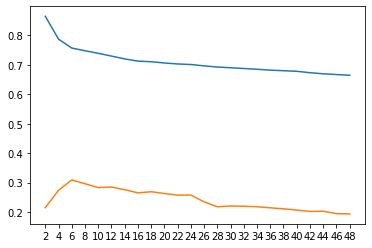

In [18]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);    #Cantidad de vecinos 

El score de test (naranja), mejora y despues empieza a bajar, lo cual nos dice que el mejor parametro para vecinos es 6 antes de que empiece a bajar la linea. 

La distancia entre la linea azul de train y la naranja de test es muy grande por lo que el modelo KNeighborsRegressor no funciona necesitamos otro 

## Curva de Aprendizaje 
Nos dira si tenemos una buena cantidad de datos y si nuestro modelo ha podido aprender de estos 

In [21]:
from sklearn.model_selection import learning_curve   
lc = learning_curve(KNeighborsRegressor(n_neighbors=6),X,y,cv=5)
#print(lc)   #Primer array cantidad con las que se entreno al modelo 
samples, train, test = lc[0], lc[1], lc[2]    #Se escojen los tres arrays

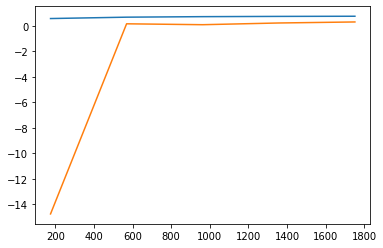

In [22]:
plt.plot(samples,np.mean(train,axis=1))    #El primer valor del R2 es muy malo por lo que no nos permite ver la diferencias, eliminamos el dato de la linea naranja donde sube
plt.plot(samples,np.mean(test,axis=1))

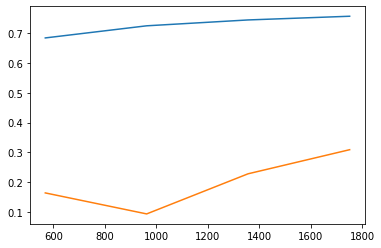

In [23]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])        # Así es como queda utilizando Slices para obtener la curva, Se puede ver en la grafica que faltan datos para funcione
plt.plot(samples[1:],np.mean(test,axis=1)[1:])         # Pero ya se recolctaron todos los datos posibles      

Un modelo simple tendrá un sesgo alto (Underfittingt), un modelo complejo tendrá una varianza alta (Overfitting). Las Curvas de Validación o Curvas de Aprendizaje nos pueden ayudar a tener un mejor diagnostico de nuestro modelo para identificar en que situación estamos y tratar de corregir eligiendo bien los parámetros o eligiendo otro modelo.

Se entiende que el modelo ha aprendido cuando:
Este mejora el score en función de la cantidad de datos o features que se han seleccionado.

El KNeighbors es un modelo muy bueno para ML pero tiene la maldición de la sobredimencionalidad y en este caso consume muchos datos, por lo tanto no es aplicable en todos los casos.

---

<img src="C:\Jupyter\7.MLCasoPractico\machine_learning\img\learning_curve.png" width=500>


El modelo aún está aprendiendo, sin embargo no tenemos como obtener datos adicionales.

** Como solucionar el overfitting y el underfitting?**

Viarianza Alta (Overfitting):

- Conseguir más ejemplos
- Reducir cantidad de features    (Alta dimensionalidad, problemas de overfitting)
- Aumentar coeficiente de regularización     
    (Simplificar el modelo por ejemplo el alpha del modelo lasso)
    Termino Regularización: Es modificar un parámetro, con el objetivo de que un modelo sea mas simple o sencillo.

Sesgo Alto (Underfitting):

- Más features  (El modelo es muy simple)
- Escoger un Modelo más complejo

Mal resultado general:

Cuando no se esta en overfitting ni underfitting, simplemente se van a tener mal resultado para ambos scores 
- Probar otro algoritmo/familia de modelos, quizás las hipotesis del modelo no son cumplidad por tu dataset